In [1]:
from Utilities.RobotClass import *
from Utilities.kukaKinematics import *

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[Open3D INFO] Resetting default logger to print to terminal.


In [2]:
Kuka = Robot(Mlist, ['z', '-z', 'x', 'x', '-z','x'], Tne)

In [3]:
Kuka.transform(Slist,[0,-np.pi/2,np.pi/2,0,0,0])
Kuka.draw_robot()

WebVisualizer(window_uid='window_0')

In [8]:
import sympy as sp
from sympy.physics.mechanics import dynamicsymbols, mechanics_printing
mechanics_printing()

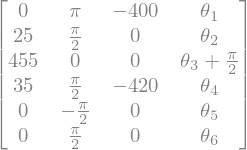

In [10]:
th1, th2, th3, th4, th5, th6 = dynamicsymbols('theta_1, theta_2, theta_3, theta_4, theta_5, theta_6')
al1,al2,al3,al4,al5,al6,al7 = sp.symbols('alpha_1,alpha_2,alpha_3,alpha_4,alpha_5,alpha_6,alpha_7,')
config = sp.Matrix([[sp.pi,0,-400,th1],[sp.pi/2,25,0,th2],[0,455,0,th3 + sp.pi/2],[sp.pi/2, 35, -420, th4],[-sp.pi/2,0,0,th5],[sp.pi/2, 0, 0,th6]])

Sic_config = sp.Matrix(sp.zeros(6,4))
Sic_config[:,0] = config[:,1]
Sic_config[:,1] = config[:,0]
Sic_config[:,2] = config[:,2]
Sic_config[:,3] = config[:,3]

Sic_config

def A1_sym(th_i, d_i):
    ct = sp.cos(th_i)
    st = sp.sin(th_i)
    A1 = sp.Matrix([[ct, -st, 0.0, 0.0], [st, ct, 0.0, 0.0], [0.0, 0.0, 1, d_i], [0.0, 0.0, 0.0, 1]])
    return A1 
def A2_sym(al_i, a_i):
    ca = sp.cos(al_i)
    sa = sp.sin(al_i)
    A2 = sp.Matrix([[1, 0.0, 0.0, a_i], [0.0, ca, -sa, 0.0], [0.0, sa, ca, 0.0], [0.0, 0.0, 0.0, 1]])
    return A2 

alp, a , d, th

In [ ]:
def T_from_sic(config):
    n = len(config.col(0))
    Alist = np.zeros((4,4,n))
    Tlist = np.zeros((4,4,n))
    for i in range(n):
        al_i = config[i,0]
        a_i = config[i,1]
        d_i = config[i,2]
        th_i = config[i,3]
        Alist[i] = A1_sym(th_i, d_i) * A2_sym(al_i, a_i)

        T = sp.eye(4)
        for j in range(i+1):
            T = T * Alist[j]
        Tlist[i] = T


In [22]:
n = len(config.col(0))
n